# Computing the Lagrangian Descriptors of Dynamical Systems

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from pylds.base import compute_lagrangian_descriptor
from pylds.tools import draw_all_lds

This expressions matches the one in the Overleaf project of the students

In [104]:
def Bohmian_velocity_field(t, u, PARAMETERS=[1,1,1]):
    x, y = u.T
    #model parameters
    a, b, omega2 = PARAMETERS
    #velocity components
    G = 1 + 2*a*x*np.cos(t) +\
        2*b*np.sqrt(omega2)*x*y*np.cos((1 + omega2)*t) +\
        (a*x)**2 +\
        2*a*b*np.sqrt(omega2)*x**2*y*np.cos(omega2*t) +\
        omega2*(b*x*y)**2
    vx = -(a*np.sin(t) + b*np.sqrt(omega2)*y*np.sin((1 + omega2)*t))/G
    vy = -b*np.sqrt(omega2)*x*(a*x*np.sin(omega2*t) + np.sin((1 + omega2)*t))/G
    
    return np.column_stack([vx, vy])

In [172]:
def Bohmian_nodal_point(t, PARAMETERS=[1,1,1]):
    #model parameters
    a, b, omega2 = PARAMETERS
    #nodal components
    x_nodal = -np.sin((1 + omega2)*t)/(a*np.sin(omega2*t))
    y_nodal = -a*np.sin(t)/(b*np.sqrt(omega2)*np.sin((1 + omega2)*t))
    
    return np.column_stack([x_nodal, y_nodal])

## Case: $a, b, c = (1, 0, 1)$

In [175]:
a, b, omega2 = [1, 0, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

In [176]:
# Integration parameters
tau = 12

# LDp, p-value
p_value = 0

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [177]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [178]:
t0, tf, dt = [0.1, tau, 0.001]
nodal_point = Bohmian_nodal_point(np.arange(t0, tf, dt), PARAMETERS=[a, b, omega2])

/home/ba13026/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


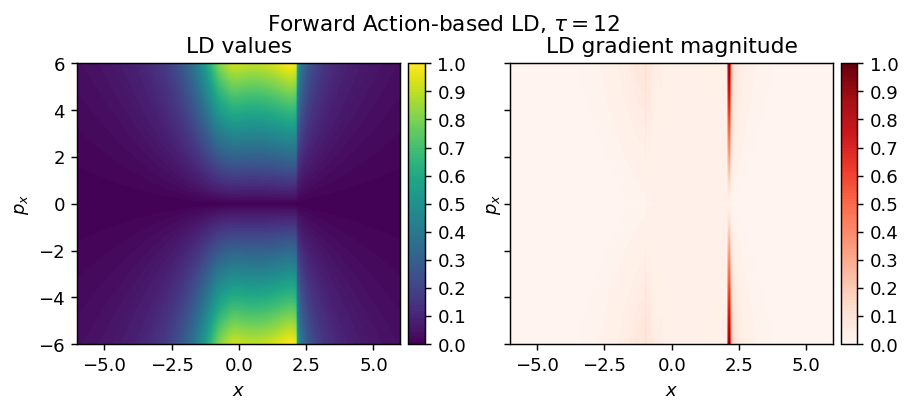

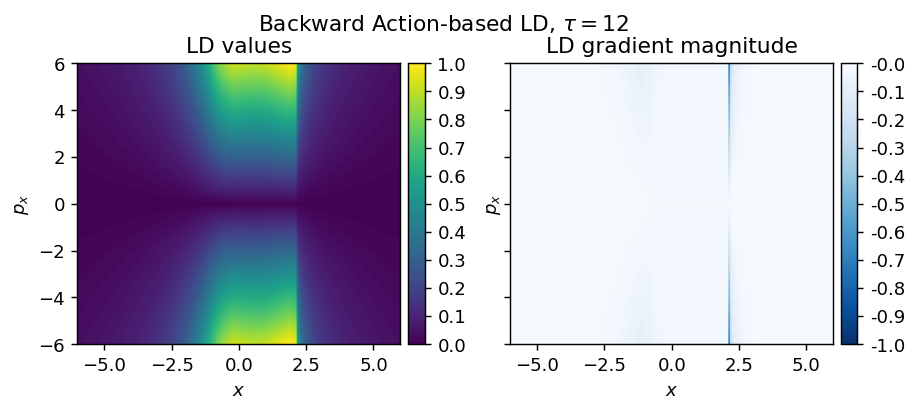

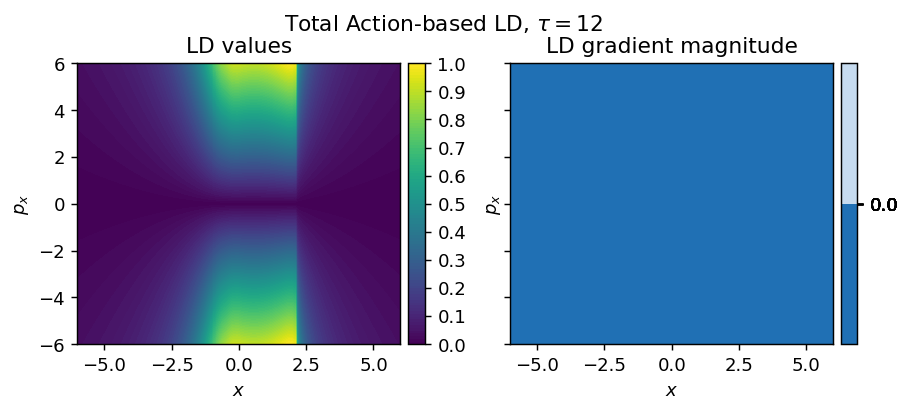

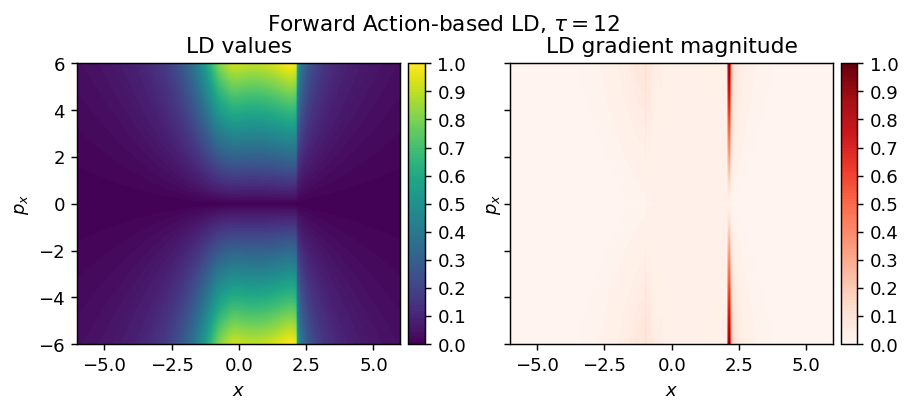

In [180]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)
fig = figs[0][0]
ax = fig.axes
ax[0].scatter(*nodal_point.T,s=0.01,c='blue', alpha=1,zorder=10)
fig

In [166]:
fig = figs[0][0]
ax = fig.axes
ax[0].scatter(0,0)#

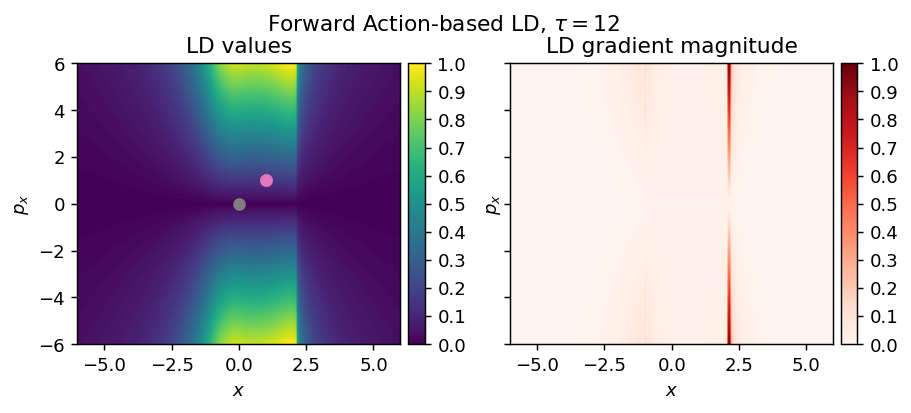

In [167]:
fig

## Case: $a, b, c = (0, 1, 1)$

In [133]:
a, b, omega2 = [0, 1, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

In [134]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 0

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [135]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False#[(box_x_min, box_x_max)]

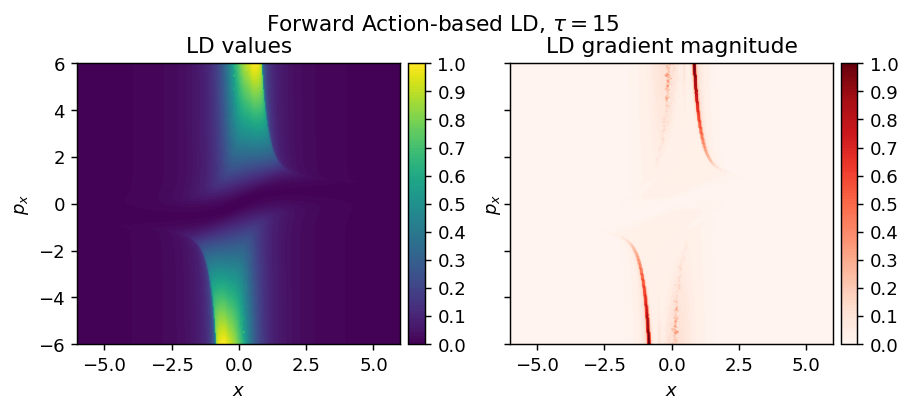

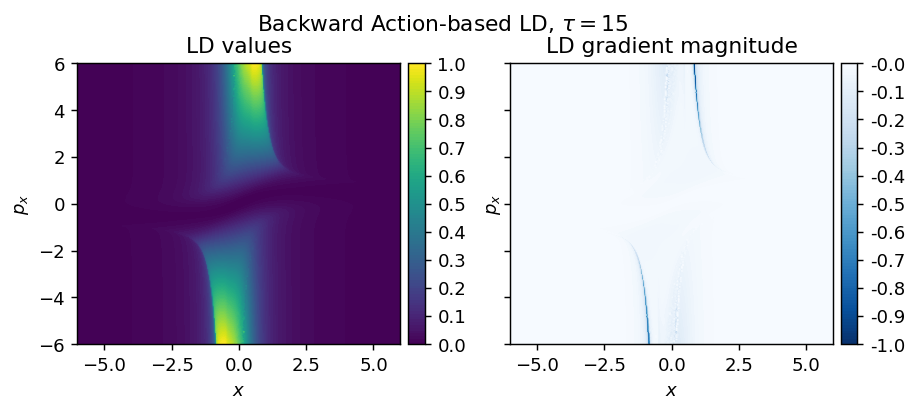

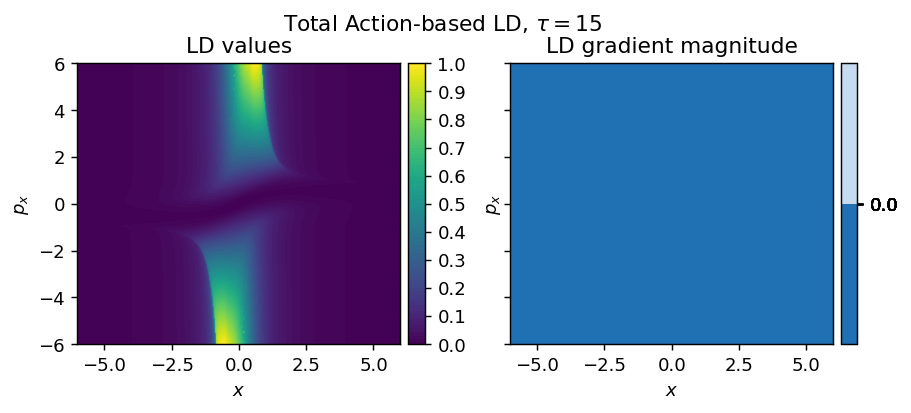

In [136]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

<span style="color:red">__TO-DO__</span> Do convergence assays for different values of $\tau = 0.1, 1, 3, 5, 8, 15$

## Case: $a, b, c = (1, 1, 1)$

In [137]:
a, b, omega2 = [1, 1, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

In [138]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 0

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [139]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False#[(box_x_min, box_x_max)]

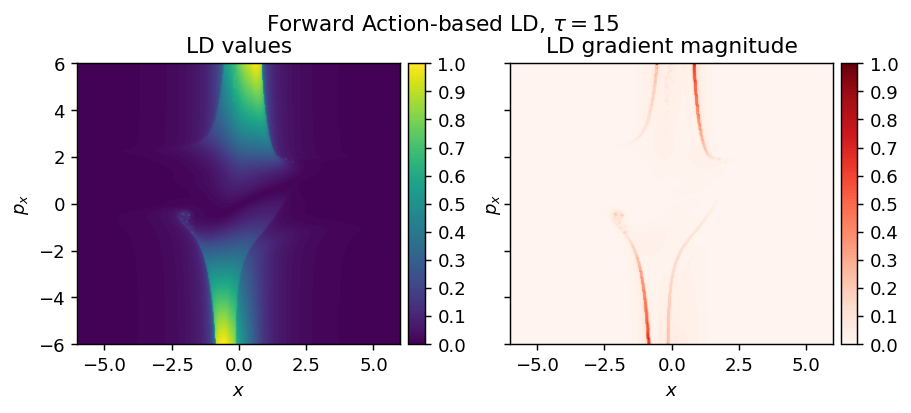

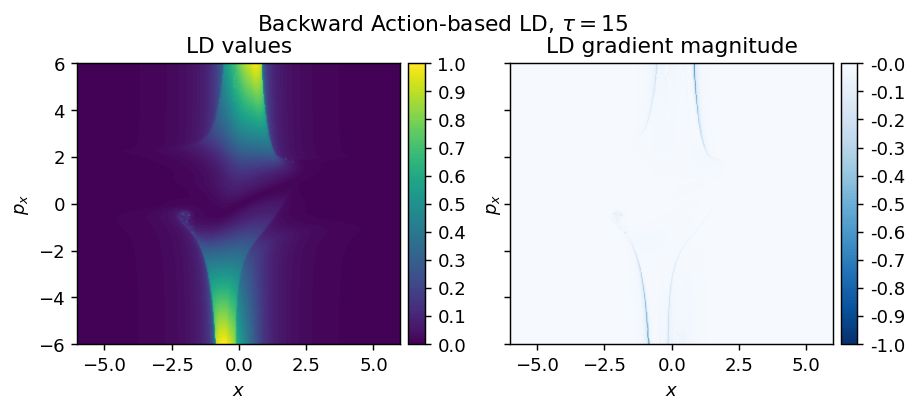

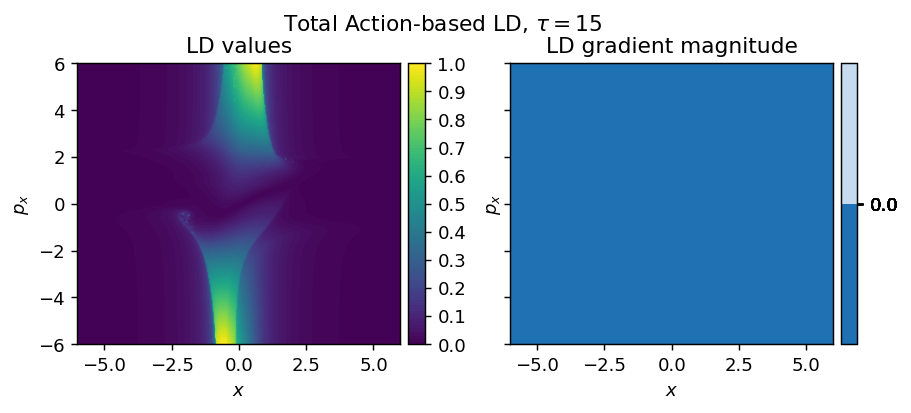

In [140]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)